# Comparisons, Masks, and Boolean Logic

## 例：雨の日をカウントする

In [1]:
import numpy as np
import pandas as pd

In [2]:
!head -5 ../data/Seattle2014.csv

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999


PRCPは降雨量を示し、ここでは1/10mm表記となっている。つまり、PRCP=10は1mmの降雨量を示す。

また、1インチ = 25.4mmであるため、以下ではインチ表記に直したものとなる。

In [3]:
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

365のarrayは2014年のシアトルにおける日毎の降雨量をインチで示したものである。

ここでまず、ヒストグラムで可視化する。

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

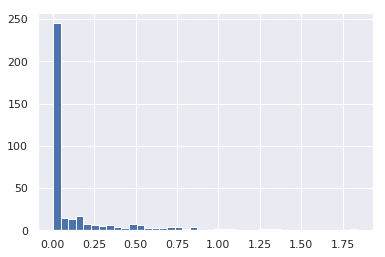

In [5]:
plt.hist(inches, 40);

## ufuncsとしての比較演算
`+`や`-`のように比較演算もまたufuncsとして使用できる。比較演算の結果は常にBoolean型のarrayとなる。全ての6つの比較演算子が利用可能である。

In [6]:
x = np.array([1, 2, 3, 4, 5])

In [7]:
x < 3

array([ True,  True, False, False, False])

In [8]:
x > 3

array([False, False, False,  True,  True])

In [9]:
x <= 3

array([ True,  True,  True, False, False])

In [10]:
x >= 3

array([False, False,  True,  True,  True])

In [11]:
x != 3

array([ True,  True, False,  True,  True])

In [12]:
x == 3

array([False, False,  True, False, False])

2つのarrayの要素ごとの比較をすることも可能。

In [13]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

比較演算子はNumPyの関数のラッパーとなっており、同等なufuncが用意されている。

|Operator|Equivalent ufunc|
|:-------|:---------------|
|==|np.equal|
|!=|np.not_equal|
|<|np.less|
|<=|np.less_equal|
|>|np.greater|
|>=|np.greater_equal|

また、これらはどのようなサイズ、shapeのarrayに対しても働く。
例えば、以下は2次元の例である。

In [14]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Boolean Arrayを扱う

In [16]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### エントリーをカウントする
`True`の数をカウントするには、`np.count_nonzero`が便利である。

In [17]:
np.count_nonzero(x < 6)

8

同様に`np.sum`を使用しても同じ結果が得られる。このとき、`False`は`0`、`True`は`1`として扱われる。

In [18]:
np.sum(x < 6)

8

`sum()`を使用する利点は、ほかのaggregationと同様に行や列に沿って操作することが可能な点である。

In [19]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

arrayのいずれか、もしくは全ての値がTrueかどうか確認したい場合には、`np.any`や`np.all`が使用できる。

In [20]:
np.any(x > 8)

True

In [21]:
np.any(x < 0)

False

In [22]:
np.all(x < 10)

True

In [23]:
np.all(x == 6)

False

`np.all`や`np.any`は特定のaxisに沿って行うことも出来る。

In [24]:
np.all(x < 8, axis=1)

array([ True, False,  True])

## Boolean演算子
NumPyではPythonのbitwise論理演算である、`&`、`|`、`^`、`~`がオーバーロードされ、使用することが出来る。これらはufuncとしてarrayの要素ごとに動作する。

例えば、以下の通りである。

In [25]:
np.sum((inches > 0.5) & (inches < 1))

29

以下の表はBoolean演算子とそれと同等なufuncsをまとめたものである。

|Operator|Equivalent ufunc|
|:-------|:---------------|
|&|np.bitwise_and|
|\||np.bitwise_or|
|^|np.bitwise_xor|
|~|np.bitwise_not|

In [26]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## maskとしてのBoolean array

In [27]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

ここで、`x < 5`を満たす`x`の要素を取り出したいとする。シンプルにこのBoolean arrayをindexとすることで要素が取り出せる。これはmasking operationとして知られる。

In [29]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

ここで返ってきた値は、mask arrayで`True`となっている位置の値全てである。

In [30]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

In [31]:
print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
